In [1]:
# 📦 Imports
import os
import json
import ast
import cv2
import numpy as np
import pandas as pd
import numbers
import matplotlib.pyplot as plt
from IPython.display import display


In [24]:
# Parameters (Set your inputs here)
# metadata_path = "/fs/ess/PAS2136/ggr_data/results/GGR2020_subset/image_data.json"
# annots_path = "/fs/ess/PAS2136/ggr_data/results/GGR2020_subset/ca_classifier/final_output_with_softmax_and_census.csv"
annots_path = "/fs/ess/PAS2136/ggr_data/results/GGR2020_subset_ia_finetuned/ca_classifier/final_output_with_softmax_and_census_raw.json"

filter_species = ["grevy's zebra"]           # set to None to ignore species
# min_CA_score = 0.5                           # set to None to skip min filter
min_CA_score = 0.0
# max_CA_score = 1.0                           # set to None to skip max filter
max_CA_score = 0.35
viewpoints = ["right", "left"]              # partial match, set to None to skip
# viewpoints = None
filter_annotations_census = True            # True / False / None to ignore
num_images = 20
output_dir = "results/grevys_zebra_ca_035"

columns_to_display = [
    # "uri",
    # "image_uuid",
    "uuid",
    # "file_name",
    "confidence",
    # "detection_class",
    # "tracking_id",
    # "timestamp",
    "species",
    # "category_id",
    # "bbox",
    "viewpoint",
    "CA_score",
    # "individual_id"
]


In [54]:
# 📂 Load Metadata
# with open(metadata_path, 'r') as file:
#     metadata = json.load(file)

# # if video_mode:
# #     image_metadata = []
# #     [image_metadata.extend(video["frame data"]) for video in metadata["videos"]]
# # else:
# image_metadata = metadata["images"]

# images = []
# uri_uuid_mapping = {}
# for image in image_metadata:
#     images.append(image["uri_original"])
#     uri_uuid_mapping[image["uri_original"]] = image["uuid"]


In [15]:
# 📑 Load annotation data
# images_df = pd.DataFrame(images, columns=["uri"])
# images_df["image_uuid"] = images_df["uri"].map(uri_uuid_mapping)

with open(annots_path, 'r') as file:
    data = json.load(file)

# categories_df = pd.DataFrame(data['categories'])
# images_df = pd.DataFrame(data['images'])
# annotations_df = pd.DataFrame(data['annotations'])
df = pd.DataFrame(data['annotations'])

# merged_df = annotations_df.merge(images_df, how='left', left_on='image_uuid', right_on='uuid', suffixes=('_ann', '_img'))

# df = merged_df.merge(categories_df, how='left', left_on='category_id', right_on='id', suffixes=('', '_cat'))


# annot_df = pd.read_csv(annots_path)

# df = pd.merge(images_df, annot_df, on="image_uuid", how="inner")




In [16]:


print("Columns in df:")
for col in df.columns:
    print(f"- {col}")

Columns in df:
- uuid
- image_uuid
- bbox
- confidence
- detection_class
- tracking_id
- timestamp
- image_path
- species
- viewpoint
- CA_score
- annotations_census
- file_name
- individual_id


In [17]:



# Count number of annotations per species
species_counts = df['species'].value_counts()

print("--------------------------------------")

print("Species Annotation Statistics:")
for species, count in species_counts.items():
    print(f"- {species}: {count} rows")






--------------------------------------
Species Annotation Statistics:
- grevy's zebra: 2498 rows
- plains zebra: 196 rows


CA score statistics:
Max ca_score: 0.9999639987945557
Min ca_score: 0.0005304549704305828


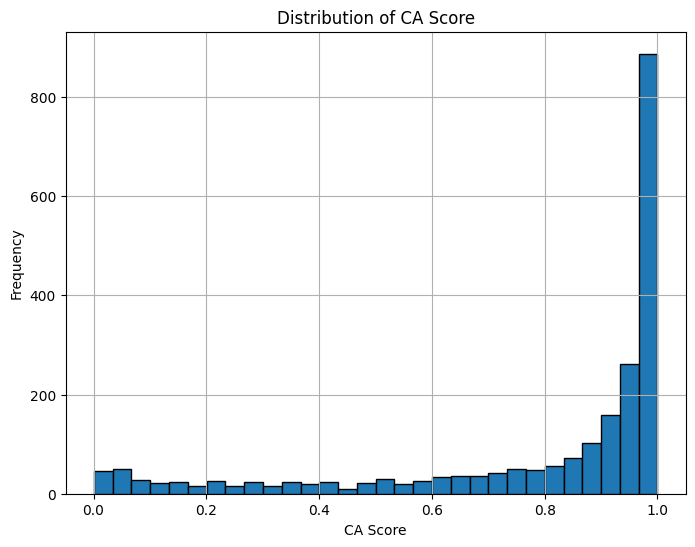

In [11]:
import matplotlib.pyplot as plt

print("CA score statistics:")
print(f"Max ca_score: {df['CA_score'].max()}")
print(f"Min ca_score: {df['CA_score'].min()}")

# Plot CA score distribution
plt.figure(figsize=(8, 6))
plt.hist(df['CA_score'], bins=30, edgecolor='black')
plt.xlabel('CA Score')
plt.ylabel('Frequency')
plt.title('Distribution of CA Score')
plt.grid(True)
plt.show()


In [25]:
filtered_df = df.copy()

# Filter by species
if filter_species is not None:
    filtered_df = filtered_df[filtered_df['species'].isin(filter_species)]

# 📉 Filter by CA_score range
if min_CA_score is not None:
    filtered_df = filtered_df[filtered_df['CA_score'] >= min_CA_score]

if max_CA_score is not None:
    filtered_df = filtered_df[filtered_df['CA_score'] <= max_CA_score]

# 👁️ Filter by partial viewpoint match
if viewpoints is not None:
    pattern = '|'.join(viewpoints)  # builds regex like "left|right"
    filtered_df = filtered_df[filtered_df['viewpoint'].astype(str).str.contains(pattern, case=False, na=False)]

# # ✅ Filter by annotations_census
# if filter_annotations_census is not None:
#     filtered_df = filtered_df[filtered_df['annotations_census'] == filter_annotations_census]

# 📊 Show result summary
print(f"Filtered rows: {len(filtered_df)} out of {len(df)}")
print("Species Annotation Statistics:")
species_counts = filtered_df['species'].value_counts()

for species, count in species_counts.items():
    print(f"- {species}: {count} rows")


print("Viewpoint Annotation Statistics:")
viewpoints_counts = filtered_df['viewpoint'].value_counts()

for vp, count in viewpoints_counts.items():
    print(f"- {vp}: {count} rows")


Filtered rows: 271 out of 2694
Species Annotation Statistics:
- grevy's zebra: 271 rows
Viewpoint Annotation Statistics:
- frontleft: 89 rows
- right: 49 rows
- frontright: 47 rows
- left: 40 rows
- backleft: 27 rows
- backright: 19 rows


In [26]:
if len(filtered_df) == 0:
    print("⚠️ No rows available in filtered_df after filtering.")
elif len(filtered_df) < num_images:
    print(f"⚠️ Only {len(filtered_df)} rows available, returning all.")
    sampled_rows = filtered_df.copy()
else:
    sampled_rows = filtered_df.sample(n=num_images, random_state=42)

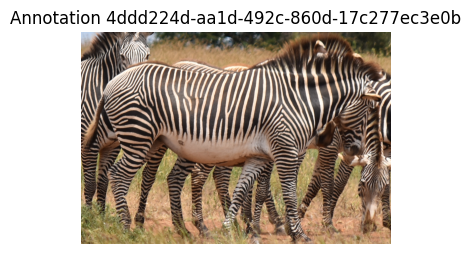

  uuid: 4ddd224d-aa1d-492c-860d-17c277ec3e0b
  confidence: 0.9196364283561707
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.32969900965690613
------------------------------------------------


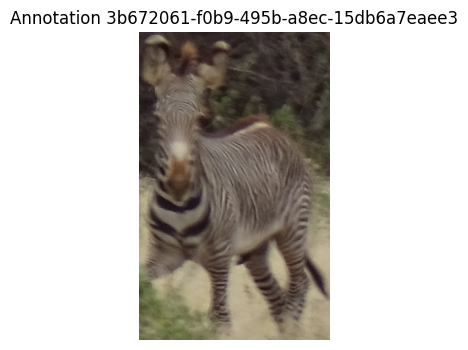

  uuid: 3b672061-f0b9-495b-a8ec-15db6a7eaee3
  confidence: 0.9099396467208862
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.3496025800704956
------------------------------------------------


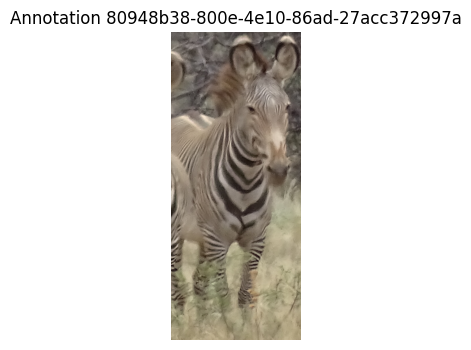

  uuid: 80948b38-800e-4e10-86ad-27acc372997a
  confidence: 0.8706350326538086
  species: grevy's zebra
  viewpoint: frontright
  CA_score: 0.0012143622152507305
------------------------------------------------


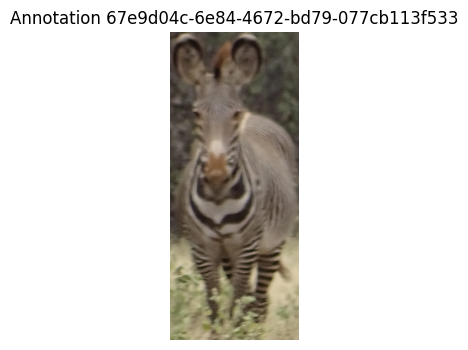

  uuid: 67e9d04c-6e84-4672-bd79-077cb113f533
  confidence: 0.9069979190826416
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.14249660074710846
------------------------------------------------


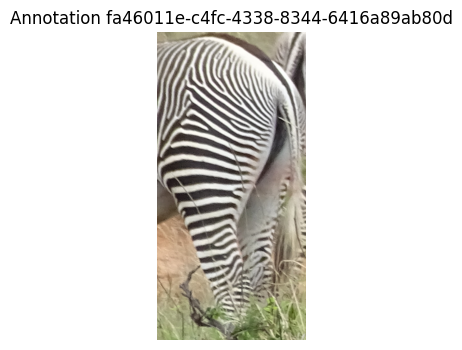

  uuid: fa46011e-c4fc-4338-8344-6416a89ab80d
  confidence: 0.8902372717857361
  species: grevy's zebra
  viewpoint: left
  CA_score: 0.06908868253231049
------------------------------------------------


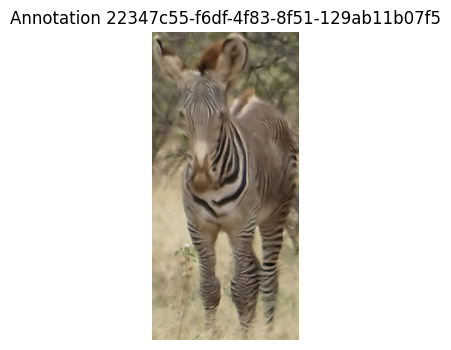

  uuid: 22347c55-f6df-4f83-8f51-129ab11b07f5
  confidence: 0.9099852442741394
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.033938225358724594
------------------------------------------------


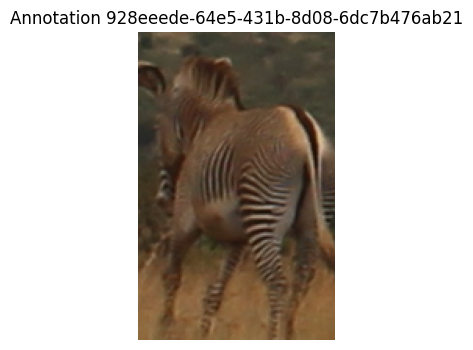

  uuid: 928eeede-64e5-431b-8d08-6dc7b476ab21
  confidence: 0.776358425617218
  species: grevy's zebra
  viewpoint: backleft
  CA_score: 0.26299214363098145
------------------------------------------------


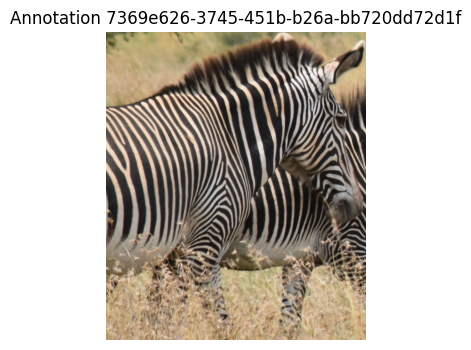

  uuid: 7369e626-3745-451b-b26a-bb720dd72d1f
  confidence: 0.9332879781723022
  species: grevy's zebra
  viewpoint: backright
  CA_score: 0.10190653800964355
------------------------------------------------


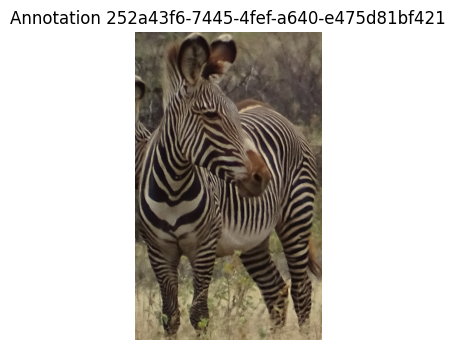

  uuid: 252a43f6-7445-4fef-a640-e475d81bf421
  confidence: 0.9201288819313049
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.08104153722524643
------------------------------------------------


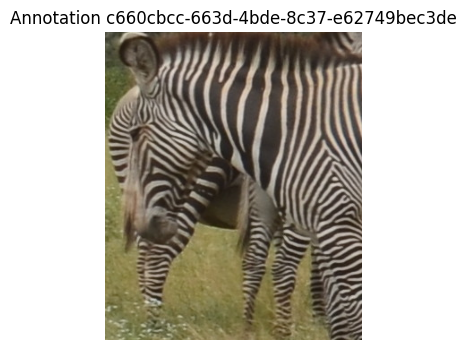

  uuid: c660cbcc-663d-4bde-8c37-e62749bec3de
  confidence: 0.8031159043312073
  species: grevy's zebra
  viewpoint: left
  CA_score: 0.1239493265748024
------------------------------------------------


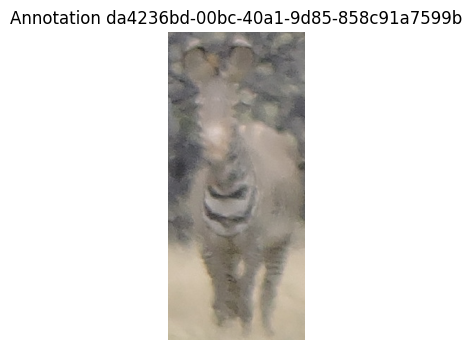

  uuid: da4236bd-00bc-40a1-9d85-858c91a7599b
  confidence: 0.8393682241439819
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.23600560426712036
------------------------------------------------


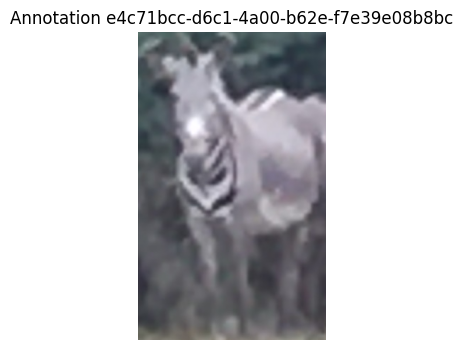

  uuid: e4c71bcc-d6c1-4a00-b62e-f7e39e08b8bc
  confidence: 0.8343701958656311
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.042201392352581024
------------------------------------------------


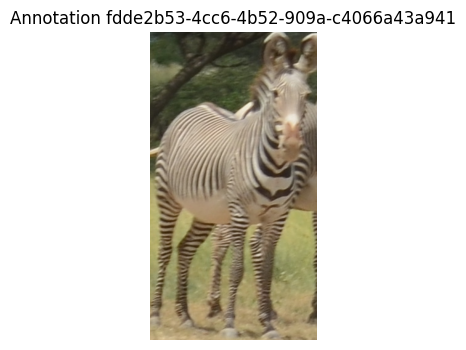

  uuid: fdde2b53-4cc6-4b52-909a-c4066a43a941
  confidence: 0.8900436758995056
  species: grevy's zebra
  viewpoint: frontright
  CA_score: 0.15818333625793457
------------------------------------------------


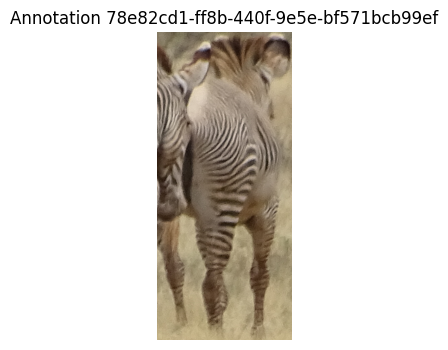

  uuid: 78e82cd1-ff8b-440f-9e5e-bf571bcb99ef
  confidence: 0.8568643927574158
  species: grevy's zebra
  viewpoint: backright
  CA_score: 0.04744235426187515
------------------------------------------------


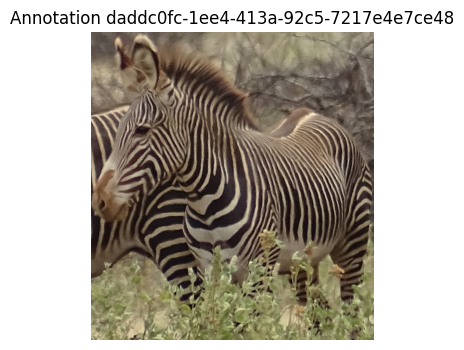

  uuid: daddc0fc-1ee4-413a-92c5-7217e4e7ce48
  confidence: 0.9072104692459106
  species: grevy's zebra
  viewpoint: frontleft
  CA_score: 0.03898223489522934
------------------------------------------------


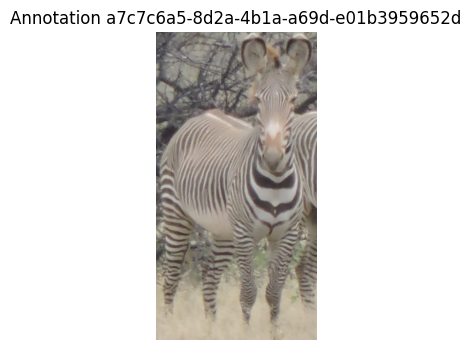

  uuid: a7c7c6a5-8d2a-4b1a-a69d-e01b3959652d
  confidence: 0.9066169857978821
  species: grevy's zebra
  viewpoint: frontright
  CA_score: 0.018052594736218452
------------------------------------------------


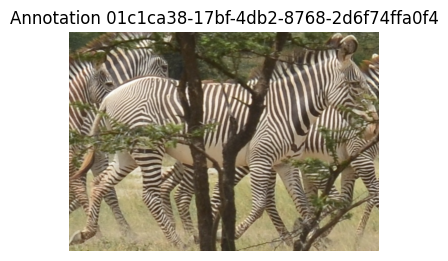

  uuid: 01c1ca38-17bf-4db2-8768-2d6f74ffa0f4
  confidence: 0.8558187484741211
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.029994038864970207
------------------------------------------------


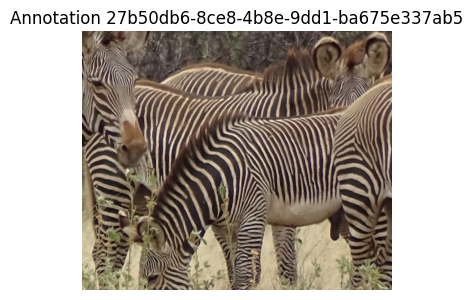

  uuid: 27b50db6-8ce8-4b8e-9dd1-ba675e337ab5
  confidence: 0.8173237442970276
  species: grevy's zebra
  viewpoint: right
  CA_score: 0.1602863073348999
------------------------------------------------


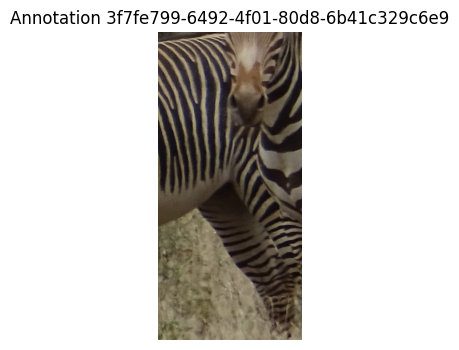

  uuid: 3f7fe799-6492-4f01-80d8-6b41c329c6e9
  confidence: 0.7827670574188232
  species: grevy's zebra
  viewpoint: left
  CA_score: 0.0015992342960089445
------------------------------------------------


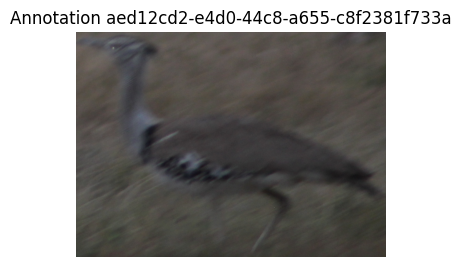

  uuid: aed12cd2-e4d0-44c8-a655-c8f2381f733a
  confidence: 0.9254531264305115
  species: grevy's zebra
  viewpoint: left
  CA_score: 0.2445637434720993
------------------------------------------------


In [27]:
# 🔍 Set number of annotations to show (cropped bboxes)

# 🖼️ Display n cropped bounding boxes with full annotation info



for _, row in sampled_rows.iterrows():

    img = cv2.imread(row['image_path'])
    if img is None:
        print(f"❌ Could not load image: {row['image_path']}")
        continue

    # Parse bounding box and crop
    bbox = np.array(row["bbox"]).astype(int)
    x1, y1, w, h = bbox
    x2, y2 = x1 + w, y1 + h

    # Ensure crop stays within image bounds
    h_img, w_img = img.shape[:2]
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    cropped = img[y1:y2, x1:x2]
    if cropped.size == 0:
        print(f"⚠️ Skipping empty crop in image: {row['image_path']}")
        continue

    # Convert to RGB and display
    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(4, 4))
    plt.imshow(cropped_rgb)
    plt.axis("off")
    plt.title(f"Annotation {row['uuid']}")
    plt.show()

    # Print all annotation fields
    for col in columns_to_display:
        print(f"  {col}: {row[col]}")

    print("------------------------------------------------")
    


In [29]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

# 📂 Output directory for combined image + text

os.makedirs(output_dir, exist_ok=True)

# 📄 Columns to include in printed text


# 🔍 Process each sampled annotation
for _, row in sampled_rows.iterrows():
    img = cv2.imread(row['image_path'])
    if img is None:
        print(f"❌ Could not load image: {row['image_path']}")
        continue

    # Parse and crop bbox
    bbox = np.array(row["bbox"]).astype(int)
    x1, y1, w, h = bbox
    x2, y2 = x1 + w, y1 + h

    h_img, w_img = img.shape[:2]
    x1, y1 = max(0, x1), max(0, y1)
    x2, y2 = min(w_img, x2), min(h_img, y2)

    cropped = img[y1:y2, x1:x2]
    if cropped.size == 0:
        print(f"⚠️ Skipping empty crop in image: {row['image_path']}")
        continue

    # Convert to RGB for matplotlib
    cropped_rgb = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)

    # 📊 Create the figure with side-by-side layout
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.imshow(cropped_rgb)
    ax.axis("off")

    # 📋 Create annotation text
    annotation_lines = [f"{col}: {row[col]}" for col in columns_to_display]
    annotation_text = "\n".join(annotation_lines)

    # 🧾 Add annotation as a text box
    plt.text(1.05, 0.5, annotation_text,
             transform=ax.transAxes,
             fontsize=10,
             verticalalignment='center',
             bbox=dict(facecolor='white', alpha=0.8, boxstyle='round'))

    # 💾 Save figure
    out_path = os.path.join(output_dir, f"{row['uuid']}.jpg")
    plt.savefig(out_path, bbox_inches='tight')
    plt.close()
    print(f"✅ Saved image with annotation: {out_path}")

✅ Saved image with annotation: results/grevys_zebra_ca_035/4ddd224d-aa1d-492c-860d-17c277ec3e0b.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/3b672061-f0b9-495b-a8ec-15db6a7eaee3.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/80948b38-800e-4e10-86ad-27acc372997a.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/67e9d04c-6e84-4672-bd79-077cb113f533.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/fa46011e-c4fc-4338-8344-6416a89ab80d.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/22347c55-f6df-4f83-8f51-129ab11b07f5.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/928eeede-64e5-431b-8d08-6dc7b476ab21.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/7369e626-3745-451b-b26a-bb720dd72d1f.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/252a43f6-7445-4fef-a640-e475d81bf421.jpg
✅ Saved image with annotation: results/grevys_zebra_ca_035/c660cbcc-663d-4bde-8c37-e62749bec3de.jpg
